In [1]:
from utils import *

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler

### Carregando o Dataset

In [2]:
df = pd.read_csv('../data/raw_data/data.csv')

### Verificando valores NaN

In [4]:
# Verificando quais colunas possuem valores NaN
nan_train = df.isnull().sum()
nan_train = nan_train[nan_train > 0]

print(nan_train)

Series([], dtype: int64)


### Separando os Dados

In [ ]:
# Alterando Variável Indoor para 0 ou 1
df['indoor'] = df['indoor'].apply(lambda val: 1 if val == True else 0)

In [6]:
df_indoor = df[df['indoor'] == 1]
df_outdoor = df[df['indoor'] == 0]

In [7]:
df_train, df_val, df_test = split_and_balance(df_indoor, df_outdoor)

#### Plotando distribuição dos usuários no conjunto de treino

In [10]:
def plot_distribution_comp(df):
    colors = df['indoor'].map({1: 'red', 0: 'blue'})

    plt.scatter(df['lat'], df['lon'], c=colors, alpha=0.3, edgecolors='w', linewidth=0.5)
    plt.title('Latitude vs Longitude - Indoor')
    plt.xlabel('Latitude')
    plt.ylabel('Longitude')
    plt.grid(True)

    plt.xlim(-8.06, -8.046)
    plt.ylim(-34.9605, -34.944)

    plt.show()

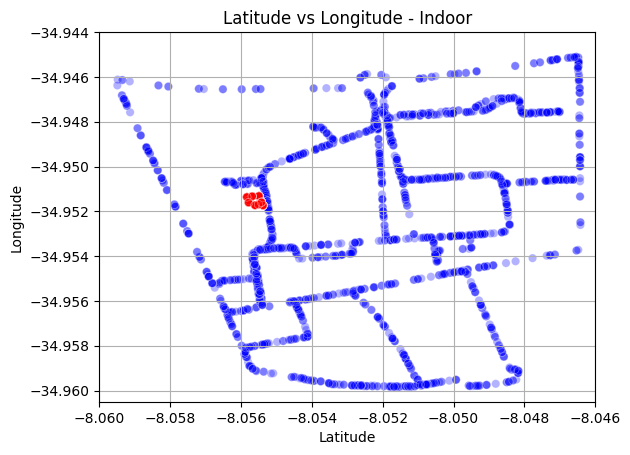

In [11]:
plot_distribution_comp(df_train)

### Normalizando os dados

In [12]:
columns_to_normalize = [
    'rssi_1_1', 'rssi_1_2', 'rssi_1_3',
    'rssi_2_1', 'rssi_2_2', 'rssi_2_3',
    'rssi_3_1', 'rssi_3_2', 'rssi_3_3',
    'delay_1', 'delay_2', 'delay_3'
]

In [13]:
scaler = MinMaxScaler()

In [14]:
scaler.fit(df_train[columns_to_normalize])

MinMaxScaler()

In [15]:
df_train[columns_to_normalize] = scaler.transform(df_train[columns_to_normalize])
df_val[columns_to_normalize] = scaler.transform(df_val[columns_to_normalize])
df_test[columns_to_normalize] = scaler.transform(df_test[columns_to_normalize])

In [16]:
df_train = pd.DataFrame(df_train)
df_val = pd.DataFrame(df_val)
df_test = pd.DataFrame(df_test)

In [17]:
df_train.head()

,ponto_id,rssi_1_1,rssi_1_2,rssi_1_3,rssi_2_1,rssi_2_2,rssi_2_3,rssi_3_1,rssi_3_2,rssi_3_3,delay_1,delay_2,delay_3,lat,lon,indoor
0,8790,0.559200,0.398652,0.703014,0.267376,0.426916,0.454187,0.317280,0.311331,0.301273,0.333333,0.571429,0.428571,-8.050090,-34.953120,0
1,3227,0.246700,0.000000,0.332592,0.000000,0.360645,0.342995,0.169190,0.339785,0.000000,0.666667,0.428571,0.428571,-8.055834,-34.951362,1
2,4180,0.184200,0.000000,0.168521,0.145990,0.318269,0.288125,0.175386,0.277219,0.000000,0.666667,0.428571,0.285714,-8.055424,-34.951597,1
3,8922,0.707155,0.446022,0.718534,0.490706,0.361142,0.451422,0.326812,0.331300,0.299672,0.166667,0.571429,0.428571,-8.049530,-34.953290,0
4,1117,0.121940,0.157226,0.161643,0.088497,0.252093,0.256320,0.087576,0.252854,0.000000,0.666667,0.428571,0.285714,-8.055380,-34.951736,1


### Salvando os conjuntos

In [18]:
df_train.to_csv('../data/treated_data/train.csv', index=False)
df_val.to_csv('../data/treated_data/validation.csv', index=False)
df_test.to_csv('../data/treated_data/test.csv', index=False)